# House Price Prediction - using Regularization (Ridge and Lasso regressions)

# Assignment- Advanced Regression
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

    Which variables are significant in predicting the price of a house, and

    How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
#Importing all required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load dataset

In [3]:
housingds= pd.read_csv('train.csv')

In [4]:
housingds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housingds.shape

(1460, 81)

In [6]:
del(housingds['Id'])

# Understand variables and data

In [7]:
housingds.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
#check Response variable or target variable available in data set columns

In [9]:
#housingds[[col for col in housingds.columns if "Price" in col]]

In [10]:
#housingds[[col for col in housingds.columns if "price" in col]]
#targvar = housingds[([col for col in housingds.columns if "Price" in col])]
respcol=[col for col in housingds.columns if "Price" in col]

In [11]:
targetvar=housingds[respcol[0]]

In [12]:
targetvar

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [13]:
del(housingds[respcol[0]])

In [14]:
housingds.columns.size

79

In [15]:
#Analyze more information related to response variable
targetvar.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [16]:
#Baed on above data we can confirm that data is in wide range but to get better understanding lets check distplot

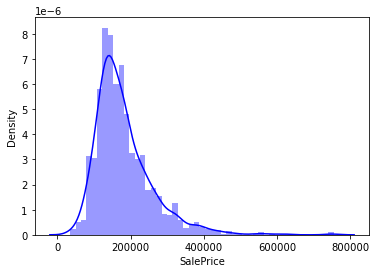

In [17]:
sns.distplot(targetvar, color = 'b')
plt.show()

In [18]:
#As per above graph, we can conclude that data is more spread towards right side. 

In [19]:
#To bring back to normality, lets do data transformation by appling log data

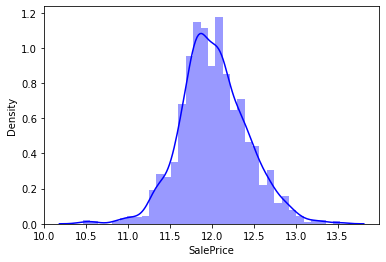

In [20]:
targetvar = np.log(targetvar)
sns.distplot(targetvar, color = 'b')
plt.show()

In [21]:
#as per above graph now response variable data is evenly spread. 

In [22]:
targetvar.isnull().sum()  #No null values in response variable which is good

0

# check for outliers in target variable

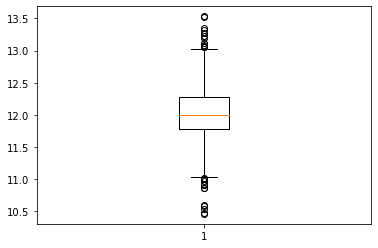

In [23]:
# check for outliers in target variable
plt.boxplot(targetvar)
plt.show()

In [24]:
# as per above, there not outliers

# Data Cleaning

In [25]:
# From all target variables list all numerical variables and then analyze whethere those are really numerical or categorical
numfeatures = housingds.select_dtypes(include=[np.number])
numfeatures.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
dtype: object

In [26]:
numfeatures.columns.size

36

In [27]:
numfeatures.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [28]:
#Filter out all categorical variables from numerical list

In [29]:
remcatfromnum = [col for col in numfeatures.columns if numfeatures[col].value_counts().size < 20]

In [30]:
for col1 in remcatfromnum:
    del(numfeatures[col1])

In [31]:
numfeatures.columns.size

21

In [32]:
#After deleting above so called categorical variables List remaining numerical features
numfeatures.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal'],
      dtype='object')

In [33]:
numfeatures.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,5.844521,1515.463699,1978.506164,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,43.489041
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,...,48.623081,525.480383,24.689725,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,496.123024
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,334.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,1129.500000,1961.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,0.000000,1464.000000,1980.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,0.000000,1776.750000,2002.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,572.000000,5642.000000,2010.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,15500.000000


# Handle outliers in numeric predictor variables

In [34]:
#Q1 = numfeatures[numfeatures.columns].quantile(0.05)
#Q3 = numfeatures[numfeatures.columns].quantile(0.95)

In [35]:
for i in numfeatures.columns:
    Q1 = numfeatures[i].quantile(0.25)
    Q2 = numfeatures[i].quantile(0.75)
    numfeatures[i] = np.where(numfeatures[i] < Q1, Q1, numfeatures[i])
    numfeatures[i] = np.where(numfeatures[i] > Q2, Q2, numfeatures[i])
    
#Q1 = numfeatures['LotArea'].quantile(0.05)
#Q2 = numfeatures['LotArea'].quantile(0.95)

In [36]:
#numfeatures['LotArea'] = np.where(numfeatures['LotArea'] < Q1, Q1, numfeatures['LotArea'])
#numfeatures['LotArea'] = np.where(numfeatures['LotArea'] > Q2, Q2, numfeatures['LotArea'])

In [37]:
# Displaying of all numerical features
#numeric_features = train.select_dtypes(include=[np.number])
#numeric_features.dtypes

In [38]:
catfeatures=housingds.loc[:,housingds.dtypes==np.object]
catfeatures.dtypes
catfeatures.columns.size

43

In [39]:
#Join both categorical varibles and removed categorical variables from numeric

In [40]:
Catvariables = pd.concat([catfeatures, housingds[list(remcatfromnum)]], axis=1, join='inner')

In [41]:
Catvariables.columns.size

58

In [42]:
Catvariables.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea',
       'MoSold', 'YrSold'],
      dtype='object')

In [43]:
#Check for any null values in numerical dataset

In [44]:
numfeatures.isnull().sum() > 0

LotFrontage       True
LotArea          False
YearBuilt        False
YearRemodAdd     False
MasVnrArea        True
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
GarageYrBlt       True
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
MiscVal          False
dtype: bool

In [45]:
#Checking missing values in percentage. 
#numfeatures.LotFrontage.isnull().size
round(100*(numfeatures.isnull().sum()/len(numfeatures.index)), 2)

LotFrontage      17.74
LotArea           0.00
YearBuilt         0.00
YearRemodAdd      0.00
MasVnrArea        0.55
BsmtFinSF1        0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinSF      0.00
GrLivArea         0.00
GarageYrBlt       5.55
GarageArea        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
MiscVal           0.00
dtype: float64

In [46]:
numfeatures.LotFrontage.isnull().size

1460

In [47]:
#In numfeatures.LotFrontage 1460 null values exists, which is  reasonable big number. Lets replace with 0 values

In [48]:
numfeatures.LotFrontage.value_counts()

80.0    353
59.0    304
60.0    143
70.0     70
75.0     53
65.0     44
78.0     25
68.0     19
64.0     19
73.0     18
79.0     17
63.0     17
72.0     17
74.0     15
66.0     15
71.0     12
67.0     12
76.0     11
69.0     11
77.0      9
62.0      9
61.0      8
Name: LotFrontage, dtype: int64

In [49]:
numfeatures['LotFrontage'].fillna(0, inplace=True) 

In [50]:
#replace MasVnrArea  null values with 0.0

In [51]:
numfeatures['MasVnrArea'].value_counts()

0.0      861
166.0    364
72.0       8
108.0      8
120.0      7
        ... 
138.0      1
137.0      1
115.0      1
126.0      1
119.0      1
Name: MasVnrArea, Length: 109, dtype: int64

In [52]:
numfeatures['MasVnrArea'].fillna(0, inplace=True) 

In [53]:
#replace GarageYrBlt null values with 0
numfeatures.GarageYrBlt.value_counts()

2002.0    355
1961.0    347
1977.0     35
1998.0     31
1999.0     30
1976.0     29
2000.0     27
1968.0     26
1993.0     22
1966.0     21
1962.0     21
1965.0     21
1970.0     20
1996.0     20
2001.0     20
1978.0     19
1997.0     19
1964.0     18
1974.0     18
1995.0     18
1994.0     18
1963.0     16
1990.0     16
1967.0     15
1980.0     15
1979.0     15
1969.0     15
1972.0     14
1973.0     14
1988.0     14
1971.0     13
1992.0     13
1987.0     11
1989.0     10
1985.0     10
1981.0     10
1975.0      9
1991.0      9
1984.0      8
1983.0      7
1986.0      6
1982.0      4
Name: GarageYrBlt, dtype: int64

In [54]:
numfeatures['GarageYrBlt'].fillna(0, inplace=True) 

In [55]:
round(100*(numfeatures.isnull().sum()/len(numfeatures.index)), 2)

LotFrontage      0.0
LotArea          0.0
YearBuilt        0.0
YearRemodAdd     0.0
MasVnrArea       0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
GarageYrBlt      0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
MiscVal          0.0
dtype: float64

In [56]:
#All numerical dataset null values are handled

In [57]:
# Lets check categorical variables null values
round(100*(Catvariables.isnull().sum()/len(Catvariables.index)), 2)

MSZoning          0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinType2      2.60
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
KitchenQual       0.00
Functional        0.00
FireplaceQu      47.26
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
GarageCond        5.55
PavedDrive        0.00
PoolQC           99.52
Fence            80.75
MiscFeature      96.30
SaleType          0.00
SaleCondition     0.00
MSSubClass 

In [58]:
#replace all categorical variables null values with none or with relevant txt
Catvariables.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [59]:
Catvariables['Alley'].fillna('None', inplace=True)

In [60]:
Catvariables.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [61]:
Catvariables['MasVnrType'].fillna('None', inplace=True) 

In [62]:
Catvariables.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [63]:
Catvariables['BsmtQual'].fillna('None', inplace=True) 

In [64]:
Catvariables.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [65]:
Catvariables['BsmtCond'].fillna('None', inplace=True) 

In [66]:
Catvariables.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [67]:
Catvariables['BsmtExposure'].fillna('None', inplace=True) 

In [68]:
Catvariables.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [69]:
Catvariables['BsmtFinType1'].fillna('None', inplace=True) 

In [70]:
Catvariables['BsmtFinType2'].fillna('None', inplace=True) 

In [71]:
Catvariables.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [72]:
Catvariables['Electrical'].fillna('None', inplace=True) 

In [73]:
Catvariables.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [74]:
Catvariables['FireplaceQu'].fillna('None', inplace=True) 

In [75]:
Catvariables.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [76]:
Catvariables['GarageType'].fillna('None', inplace=True) 

In [77]:
Catvariables.GarageFinish.fillna('None', inplace=True) 

In [78]:
Catvariables.GarageCond.fillna('None', inplace=True) 

In [79]:
Catvariables.PoolQC.fillna('None', inplace=True)

In [80]:
Catvariables.Fence.fillna('None', inplace=True)

In [81]:
Catvariables.MiscFeature.fillna('None', inplace=True)

In [82]:
Catvariables.GarageQual.fillna('None', inplace=True)


In [83]:
round(100*(Catvariables.isnull().sum()/len(Catvariables.index)), 2)

MSZoning         0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
KitchenQual      0.0
Functional       0.0
FireplaceQu      0.0
GarageType       0.0
GarageFinish     0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
PoolQC           0.0
Fence            0.0
MiscFeature      0.0
SaleType         0.0
SaleCondition    0.0
MSSubClass       0.0
OverallQual      0.0
OverallCond      0.0
BsmtFullBath     0.0
BsmtHalfBath 

In [84]:
#As per above data, all null values handled in categorical variables

In [85]:
#In GarageYrBlt,YearRemodAdd,YearBuilt,YrSold, instead of year, replace with number of years before 2022

In [86]:
(Catvariables[['YrSold']] == 0).sum()

YrSold    0
dtype: int64

In [87]:
(numfeatures[['YearBuilt']] == 0).sum()

YearBuilt    0
dtype: int64

In [88]:
(numfeatures[['YearRemodAdd']] == 0).sum()

YearRemodAdd    0
dtype: int64

In [89]:
(numfeatures[['GarageYrBlt']] == 0).sum()

GarageYrBlt    81
dtype: int64

In [90]:
numfeatures['YearBuilt'] = 2022 - numfeatures['YearBuilt']
numfeatures['YearRemodAdd'] = 2022 - numfeatures['YearRemodAdd']
numfeatures['GarageYrBlt'] = 2022 - numfeatures['GarageYrBlt']
Catvariables['YrSold'] = 2022 - Catvariables['YrSold']

In [91]:
#combile all numberical and categorical variable as one combined pridictor dataset
predictvar = pd.concat([numfeatures, Catvariables], axis=1, join='inner')

In [92]:
predictvar.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold,YrSold
0,65.0,8450.0,22.0,19.0,166.0,706.00,0.0,223.0,856.00,882.0,...,2,1,3,1,8,0,2,0,2,14
1,80.0,9600.0,46.0,46.0,0.0,712.25,0.0,284.0,1262.00,1262.0,...,2,0,3,1,6,1,2,0,5,15
2,68.0,11250.0,22.0,20.0,162.0,486.00,0.0,434.0,920.00,920.0,...,2,1,3,1,6,1,2,0,9,14
3,60.0,9550.0,68.0,52.0,0.0,216.00,0.0,540.0,795.75,961.0,...,1,0,3,1,7,1,3,0,2,16
4,80.0,11601.5,22.0,22.0,166.0,655.00,0.0,490.0,1145.00,1145.0,...,2,1,4,1,9,1,3,0,12,14


In [93]:
targetvar.value_counts()

11.849398    20
11.813030    17
11.951180    14
11.884489    14
12.154779    13
             ..
12.219310     1
12.013095     1
12.246735     1
12.109011     1
11.901583     1
Name: SalePrice, Length: 663, dtype: int64

# In categorical variables there are more than 2 or 3 unique string values exists which should be standardized to fit data

In [94]:
# Run for loop for view of all categorical variables and unique identifiers
for c in Catvariables.columns:
    print('{:<20}'.format(c), predictvar[c].unique())

MSZoning             ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street               ['Pave' 'Grvl']
Alley                ['None' 'Grvl' 'Pave']
LotShape             ['Reg' 'IR1' 'IR2' 'IR3']
LandContour          ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities            ['AllPub' 'NoSeWa']
LotConfig            ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope            ['Gtl' 'Mod' 'Sev']
Neighborhood         ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1           ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2           ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType             ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle           ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle            ['Gable' '

In [95]:
columns1 = ('MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition')

# Apply LabelEncoder to all columns above
for i in columns1:
    lbl = LabelEncoder() 
    lbl.fit(list(predictvar[i].values)) 
    predictvar[i] = lbl.transform(list(predictvar[i].values))

# Split train test data

In [96]:
y = targetvar
X = predictvar

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state =100)

In [98]:
X_train

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold,YrSold
133,0.0,7553.5,22.0,20.0,136.0,712.25,0.0,262.0,1267.00,1296.00,...,2,0,2,1,6,0,2,0,6,13
290,80.0,11601.5,22.0,18.0,0.0,0.00,0.0,808.0,1079.00,1079.00,...,2,1,3,1,8,1,2,0,7,16
24,0.0,8246.0,54.0,21.0,0.0,188.00,0.0,223.0,1060.00,1060.00,...,1,0,3,1,6,1,1,0,5,12
1093,71.0,9230.0,57.0,24.0,166.0,661.00,0.0,223.0,864.00,1200.00,...,1,1,1,1,6,0,2,0,10,16
1288,59.0,7553.5,22.0,22.0,0.0,712.25,0.0,343.0,1298.25,1391.25,...,2,0,2,1,5,1,2,0,10,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,63.0,8199.0,22.0,18.0,0.0,648.00,0.0,223.0,795.75,882.00,...,2,1,3,1,7,1,2,0,10,14
53,68.0,11601.5,41.0,35.0,0.0,712.25,0.0,223.0,1298.25,1391.25,...,0,1,0,1,5,1,3,0,11,16
350,68.0,7820.0,22.0,18.0,166.0,0.00,0.0,808.0,1298.25,1391.25,...,2,0,2,1,6,1,2,0,12,15
79,60.0,10440.0,68.0,41.0,0.0,0.00,0.0,440.0,795.75,882.00,...,1,1,2,1,5,0,2,0,5,13


# Modelling

# Linear regression

In [99]:
#Linear Regression
#Create linear regression 
lm = linear_model.LinearRegression()

#Train the model using the training sets
lm.fit(X_train, y_train)

# Make predictions using the testing set
#y_pred = lm.predict(X_train)


LinearRegression()

In [100]:
y_pred = lm.predict(X_test)
print('The accuracy of the Linear Regression is',r2_score(y_test,y_pred))
print ('RMSE is: ', mean_squared_error(y_test, y_pred))

The accuracy of the Linear Regression is 0.811807003221045
RMSE is:  0.03239958482198553


# Ridge Regression

In [101]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [102]:
# Printing the best hyperparameter alpha
print("Optimal value of Alpha is: ",model_cv.best_params_)
ridge_alpha = list(model_cv.best_params_.values())[-1]

Optimal value of Alpha is:  {'alpha': 50}


In [103]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = list(model_cv.best_params_.values())[-1]
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-9.19400290e-05  1.37845028e-05 -1.22612495e-03 -1.26059324e-03
 -1.63882558e-05  1.04778612e-04  0.00000000e+00 -6.85541217e-06
  2.62151372e-04  7.40262650e-05  5.89619657e-05  0.00000000e+00
  2.68101222e-04 -9.88717710e-06  1.98175824e-05  1.04213303e-04
  3.50270007e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.11921843e-02  8.84104957e-03  2.97292931e-02
 -7.55458533e-03  7.62638946e-03 -1.04444736e-03 -1.73683202e-05
  3.17982969e-02  9.13688745e-04 -2.55878977e-03 -1.64737844e-02
 -5.83665077e-03 -1.37673343e-03  6.71970745e-03  2.05773297e-02
 -2.34036533e-04 -1.02173322e-03  2.44003286e-03 -8.86479447e-03
  1.23309088e-02  1.32015185e-02 -1.37616969e-02  6.20862324e-03
 -7.40067558e-03 -2.75605260e-03 -4.01103946e-03 -9.99538419e-04
 -6.22379811e-03  4.38330445e-02  2.90249682e-03 -1.96970025e-02
  1.86064716e-02 -1.10590444e-02 -1.22112931e-03 -9.48837587e-03
  7.71194127e-03  5.49030746e-03  2.83330649e-02 -2.85288635e-02
  2.93436103e-03 -1.12022

In [104]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R-Square value for Train dataset: ", r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R-Square value for Test dataset: ",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

R-Square value for Train dataset:  0.8902726109073386
R-Square value for Test dataset:  0.8768554645234838
20.028215877566897
6.190617675049514
0.01714744510065659
0.021200745462498335


# Lasso Regression

In [105]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

folds = 5

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [106]:
# Printing the best hyperparameter alpha
print("Optimal value of Alpha is: ",model_cv.best_params_)
lasso_alpha = list(model_cv.best_params_.values())[-1]

Optimal value of Alpha is:  {'alpha': 0.001}


In [107]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =list(model_cv.best_params_.values())[-1]

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [108]:
lasso.coef_

array([-7.84528784e-05,  1.38452715e-05, -1.24494111e-03, -1.21761545e-03,
       -2.80565634e-05,  1.01717809e-04,  0.00000000e+00, -1.23615418e-05,
        2.62443112e-04,  6.96002347e-05,  5.30062299e-05,  0.00000000e+00,
        2.67190921e-04, -5.32686227e-06, -4.90855271e-06,  1.05073333e-04,
        3.70577353e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.02781746e-02,  0.00000000e+00,  3.54000748e-02,
       -6.83053735e-03,  6.24664012e-03, -0.00000000e+00, -0.00000000e+00,
        3.71193561e-02,  8.74760637e-04, -5.78482649e-04, -9.73851309e-03,
       -3.87010566e-03, -6.97656125e-04,  5.31574083e-03,  1.96639428e-02,
       -9.77232395e-05, -1.08702622e-03,  0.00000000e+00, -6.43436413e-03,
        1.13696290e-02,  1.20489122e-02, -1.30316494e-02,  4.59967930e-03,
       -6.24914847e-03, -2.39077982e-03, -2.84291176e-03,  0.00000000e+00,
       -5.80828366e-03,  6.44377266e-02,  1.07267318e-03, -2.01893887e-02,
        1.80030407e-02, -

In [109]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R-Square value for Train dataset: ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R-Square value for Test dataset: ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

R-Square value for Train dataset:  0.8920304982202351
R-Square value for Test dataset:  0.8725563102964339
19.70735390425051
6.406741111162634
0.016872734507063794
0.02194089421631039


# Final Model Evaluation based on test dataset and conclusion

In [110]:
# The r2_score of lasso is little higher than ridge for the train dataset 
# The r2_score of lasso is lesser than ridge for the test dataset
# In Ridge, r2_score is almost same for train and test dataset
# where as in Lasso, r2_score is less for test dataset when compared to train dataset. But difference is not very high

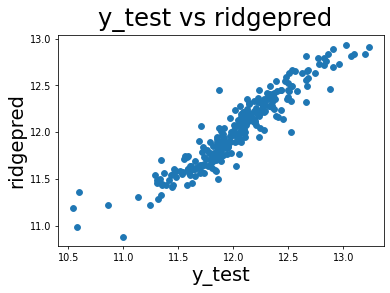

In [111]:
# plot graph to understand spread of data points for ridge regression
ridgepred = ridge.predict(X_test)
fig = plt.figure(dpi=70)
plt.scatter(y_test,ridgepred)
fig.suptitle('y_test vs ridgepred', fontsize=25)              
plt.xlabel('y_test', fontsize=20)                         
plt.ylabel('ridgepred', fontsize=20)  
plt.show()

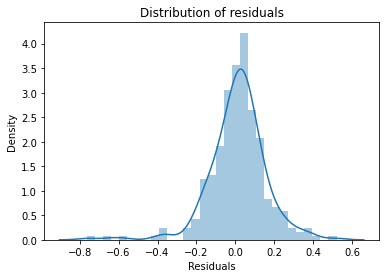

In [112]:
#checking the distribution of residuals
y_res=y_test-ridgepred
sns.distplot(y_res,kde=True)
plt.title('Distribution of residuals')
plt.xlabel("Residuals")
plt.show()

In [113]:
lassopred = lasso.predict(X_test)

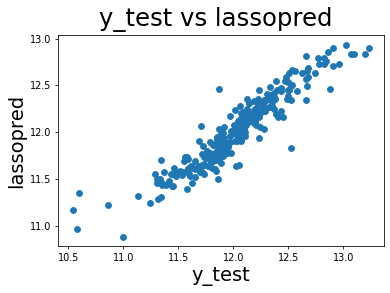

In [114]:
fig = plt.figure(dpi=70)
plt.scatter(y_test,lassopred)
fig.suptitle('y_test vs lassopred', fontsize=25)              
plt.xlabel('y_test', fontsize=20)                         
plt.ylabel('lassopred', fontsize=20)  
plt.show()

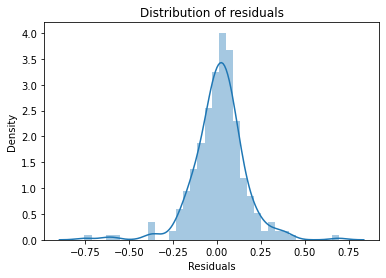

In [115]:
#checking the distribution of residuals
y_res=y_test-lassopred
sns.distplot(y_res,kde=True)
plt.title('Distribution of residuals')
plt.xlabel("Residuals")
plt.show()

# Below are the signicant variables to predict price of  a house

In [116]:
Predictvars = pd.DataFrame(index=X_train.columns)

In [117]:
Predictvars.rows = X_train.columns

In [118]:
Predictvars['Ridge'] = ridge.coef_
Predictvars['Lasso'] = lasso.coef_

In [119]:
pd.set_option('display.max_rows', None)
Predictvars.head(50)

,Ridge,Lasso
LotFrontage,-0.000092,-0.000078
LotArea,0.000014,0.000014
YearBuilt,-0.001226,-0.001245
YearRemodAdd,-0.001261,-0.001218
MasVnrArea,-0.000016,-0.000028
BsmtFinSF1,0.000105,0.000102
BsmtFinSF2,0.000000,0.000000
BsmtUnfSF,-0.000007,-0.000012
TotalBsmtSF,0.000262,0.000262
1stFlrSF,0.000074,0.000070


# Code created to provide answers for questions listed in Problem Statement-2

# Q1

In [120]:
#Ridge
alpha = np.add(ridge_alpha,ridge_alpha)
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=100)

In [121]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print("R-Square value for Train dataset: ", r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R-Square value for Test dataset: ",r2_test_lr)


R-Square value for Train dataset:  0.8880723098606176
R-Square value for Test dataset:  0.8755126366228568


In [122]:
#Lasso
alpha =np.add(lasso_alpha,lasso_alpha)

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [123]:
lasso.coef_

array([-9.09009320e-05,  1.49272162e-05, -1.65054232e-03, -1.35907186e-03,
       -2.37772811e-05,  1.11321564e-04,  0.00000000e+00, -1.54754773e-05,
        2.81432427e-04,  7.32319827e-05,  7.99753595e-05,  0.00000000e+00,
        2.74012538e-04, -1.42216375e-05,  3.61534510e-05,  1.13064056e-04,
        3.80433151e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -9.72130397e-03,  0.00000000e+00,  2.10195822e-02,
       -6.26869104e-03,  1.88636199e-03, -0.00000000e+00, -0.00000000e+00,
        2.15617381e-02,  8.08113302e-04, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  3.58117066e-03,  1.76690843e-02,
       -0.00000000e+00, -1.28423354e-03,  0.00000000e+00, -4.37139015e-03,
        8.38455043e-03,  8.04260320e-03, -1.26927404e-02,  4.50977145e-03,
       -6.51522134e-03, -2.71774616e-03, -2.71546740e-03,  0.00000000e+00,
       -5.85693635e-03,  4.78034029e-02,  1.63725708e-03, -1.89856930e-02,
        1.66918987e-02, -

In [124]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print("R-Square value for Train dataset: ",r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R-Square value for Test dataset: ",r2_test_lr)

R-Square value for Train dataset:  0.8869453265324618
R-Square value for Test dataset:  0.8783393628989038


In [125]:
#important predictor variables
cols = pd.DataFrame(index=X_train.columns)
cols.rows = X_train.columns
cols['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
cols.head(50)

,Lasso
LotFrontage,-0.000091
LotArea,0.000015
YearBuilt,-0.001651
YearRemodAdd,-0.001359
MasVnrArea,-0.000024
BsmtFinSF1,0.000111
BsmtFinSF2,0.000000
BsmtUnfSF,-0.000015
TotalBsmtSF,0.000281
1stFlrSF,0.000073


# Q3

In [126]:
#LotArea, BsmtFinSF1, MasVnrArea, BsmtFinSF2, 2ndFlrSF
#Drop above 5 important variables from X_train, X_test

In [127]:
X_trainQ3 = X_train.drop(['LotArea','BsmtFinSF1','MasVnrArea','BsmtFinSF2','2ndFlrSF'],axis=1)
X_testQ3 = X_test.drop(['LotArea','BsmtFinSF1','MasVnrArea','BsmtFinSF2','2ndFlrSF'],axis=1)

In [128]:
X_trainQ3.shape

(1168, 74)

In [129]:
#As per Q2, i preferred Lasso because of better results,
#So here i use Lasso to predict after dropping 5 important variables

In [130]:

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

folds = 5

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_trainQ3, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [131]:
# Printing the best hyperparameter alpha
print("Optimal value of Alpha is: ",model_cv.best_params_)

Optimal value of Alpha is:  {'alpha': 0.001}


In [132]:
alpha =0.001

lasso1 = Lasso(alpha=alpha)
        
lasso1.fit(X_trainQ3, y_train) 

Lasso(alpha=0.001)

In [133]:
lasso1.coef_

array([-6.61081406e-05, -1.09005808e-03, -1.06736306e-03, -8.28268880e-05,
        3.25623156e-04,  2.34214203e-05,  0.00000000e+00,  3.09969894e-04,
       -6.17927264e-06,  2.50359582e-05,  9.22637558e-05,  3.65539697e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.31137069e-02,  0.00000000e+00,  2.96871179e-02, -8.91171197e-03,
        7.46673803e-03, -0.00000000e+00, -7.11440254e-04,  3.99653978e-02,
        9.28697484e-04, -0.00000000e+00, -8.44299812e-03, -1.35454196e-02,
       -9.42394240e-04,  5.66812740e-03,  2.03718763e-02,  0.00000000e+00,
       -1.24513533e-03, -0.00000000e+00, -4.26033003e-03,  1.18523517e-02,
        1.01745292e-02, -1.34435494e-02,  5.70075277e-03, -7.20962031e-03,
       -5.84564524e-03,  9.74497880e-04,  0.00000000e+00, -5.16396744e-03,
        7.10147516e-02,  1.03893962e-03, -2.02428449e-02,  1.69845152e-02,
       -1.09472990e-02, -2.52180476e-03, -8.54668907e-03,  7.94458794e-03,
        1.05282500e-03,  

In [134]:
y_pred_train = lasso1.predict(X_trainQ3)
y_pred_test = lasso1.predict(X_testQ3)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R-Square value for Train dataset: ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R-Square value for Test dataset: ",r2_test_lr)
metric3.append(r2_test_lr)

R-Square value for Train dataset:  0.8896633448102482
R-Square value for Test dataset:  0.86516527213917


In [135]:
# there is very slight change in Rsquare value

In [136]:
#important predictor variables
cols = pd.DataFrame(index=X_trainQ3.columns)
cols.rows = X_train.columns
cols['Lasso'] = lasso1.coef_
pd.set_option('display.max_rows', None)
cols.head(50)

,Lasso
LotFrontage,-0.000066
YearBuilt,-0.001090
YearRemodAdd,-0.001067
BsmtUnfSF,-0.000083
TotalBsmtSF,0.000326
1stFlrSF,0.000023
LowQualFinSF,0.000000
GrLivArea,0.000310
GarageYrBlt,-0.000006
GarageArea,0.000025


# End